In [1]:
#/content/drive/MyDrive/Works/Deep_Learning/Cifar100/data
!cp -r /content/drive/MyDrive/Works/Deep_Learning/Cifar100/data.zip .
!unzip -q data.zip 
!rm data.zip

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 64)          0

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
150/150 [==============================] - 10s 21ms/step - loss: 1.5830 - acc: 0.3317 - val_loss: 1.1951 - val_acc: 0.5417
Epoch 2/30
150/150 [==============================] - 3s 18ms/step - loss: 1.1882 - acc: 0.5336 - val_loss: 1.0224 - val_acc: 0.6217
Epoch 3/30
150/150 [==============================] - 3s 18ms/step - loss: 1.0554 - acc: 0.6008 - val_loss: 0.9330 - val_acc: 0.6600
Epoch 4/30
150/150 [==============================] - 3s 18ms/step - loss: 0.9072 - acc: 0.6635 - val_loss: 0.8862 - val_acc: 0.6733
Epoch 5/30
150/150 [==============================] - 3s 18ms/step - loss: 0.8713 - acc: 0.6748 - val_loss: 0.8073 - val_acc: 0.7083
Epoch 6/30
150/150 [==============================] - 3s 18ms/step - loss: 0.8204 - acc: 0.7045 - val_loss: 0.7814 - val_acc: 0.6967
Epoch 7/30
150/150 [==============================] - 3s 18ms/step - loss: 0.7670 - acc: 0.7147 - val_loss: 0.7233 - val_acc: 0.7450
Epoch 8/30
150/150 [==============================] - 3s 18ms/step -

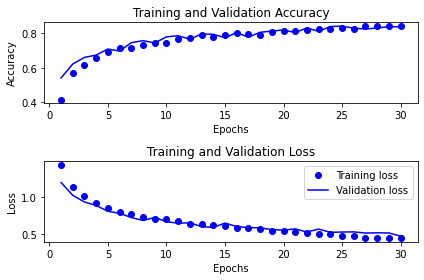

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from matplotlib import pyplot as plt
from keras.datasets import cifar100
from keras import layers
from keras import models
import tensorflow as tf
import numpy as np
import cv2
import os
from keras import optimizers
from keras.callbacks import CSVLogger


train_dir='data/train'
test_dir='data/test'

model=models.Sequential()

model.add(layers.Conv2D(32,(3,3),
                        padding='same',
                        activation='relu',
                        input_shape=(32,32,3)))

model.add(layers.Conv2D(32,(3, 3),
                         padding='same',
                         activation='relu'))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64,(3, 3),
                         padding='same',
                         activation='relu'))

model.add(layers.Conv2D(64,(3,3),
                        padding='same',
                        activation='relu'))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Dropout(0.5))

#Dense layer:
model.add(layers.Flatten())

model.add(layers.Dense(256, activation='relu'))

model.add(layers.Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer=optimizers.Adamax(lr=5e-4), 
              metrics=['acc'])

#dizayn edilen modelin içinde kaç tane parametre var onu görmemizi sağlar
print(model.summary())

train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen= ImageDataGenerator(rescale=1./255)



datagen_aug = ImageDataGenerator(
              zoom_range=0.2,
              horizontal_flip=True,
              rescale=1./255)

datagen = ImageDataGenerator(rescale = 1./255)

train_generator = datagen_aug.flow_from_directory(train_dir,
                                          target_size = (32,32),
                                          batch_size =20,
                                          class_mode = 'categorical')
 
test_generator = datagen_aug.flow_from_directory(test_dir,
                                          target_size = (32,32),
                                          batch_size = 20,
                                          class_mode = 'categorical')

#csv_logger = CSVLogger('model/training_end.log', separator=',', append=False)

history = model.fit_generator(train_generator,
                              steps_per_epoch=150,
                              epochs=30,
                              #callbacks=[csv_logger],
                              validation_data=test_generator,
                              validation_steps=30) 

model.save('cifar100-son/model/best_model_end.h5')

def plot_acc_loss(x):  
  acc = x.history["acc"]
  val_acc = x.history["val_acc"]
  loss = x.history["loss"]
  val_loss = x.history["val_loss"]
  print("acc =", acc[-1])
  print("val_acc = ", val_acc[-1])
  print("loss =", loss[-1])
  print("val_loss =", val_loss[-1])
  epochs = range(1, len(acc) + 1)
  fig = plt.figure()
  plt.subplot(2,1,1)
  plt.plot(epochs, acc, "bo", label="Training acc")
  plt.plot(epochs, val_acc, "b", label="Validation acc")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.title("Training and Validation Accuracy")

  plt.subplot(2,1,2)
  plt.plot(epochs, loss, "bo", label="Training loss")
  plt.plot(epochs, val_loss, "b", label="Validation loss")
  plt.title("Training and Validation Loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  fig.tight_layout()
  plt.show()
  fig.savefig("cifar100-son/graph.png")
  

plot_acc_loss(history)

In [3]:
!zip -r cifar100-son.zip cifar100-son

  adding: cifar100-son/ (stored 0%)
  adding: cifar100-son/model/ (stored 0%)
  adding: cifar100-son/model/best_model_end.h5 (deflated 9%)
  adding: cifar100-son/graph.png (deflated 5%)


In [4]:
!cp cifar100-son.zip /content/drive/MyDrive/Works/Deep_Learning/Cifar100/